## Importado de los datos

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Importo el csv desde una URL y lo guardo

url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'

data = pd.read_csv(url, sep=';' )

# Guardo el archivo
data.to_csv('../data/raw/Data.csv', index = False )

## Analisis de datos

#### Primeras 10 columnas para contextualizar el Dataframe


In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### La siguiente informacion la usamos para contextualizar y saber que columnas son importantes o no

In [9]:
data.shape

(41188, 21)

In [10]:
data.duplicated().sum()

np.int64(12)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
# Compruebo duplicados por cada una de las columnas

def comprobar_dup(dataframe):
    duplicados = {col: int(dataframe[col].duplicated().sum()) for col in dataframe.columns}
    return duplicados

comprobar_dup(data)

{'age': 41110,
 'job': 41176,
 'marital': 41184,
 'education': 41180,
 'default': 41185,
 'housing': 41185,
 'loan': 41185,
 'contact': 41186,
 'month': 41178,
 'day_of_week': 41183,
 'duration': 39644,
 'campaign': 41146,
 'pdays': 41161,
 'previous': 41180,
 'poutcome': 41185,
 'emp.var.rate': 41178,
 'cons.price.idx': 41162,
 'cons.conf.idx': 41162,
 'euribor3m': 40872,
 'nr.employed': 41177,
 'y': 41186}

In [13]:
# Quitamos duration, day_of_week, month, previous, nr.employed, campaign, poutcome, contact

data.drop(columns = ['duration', 'day_of_week', 'month', 'previous', 'campaign', 'contact', 'nr.employed', 'poutcome'], inplace = True)

In [14]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'y'],
      dtype='object')

Elimino estas columnas por contener datos que no considero importantes a la hora de entrenar mi modelo y que este pueda discernir correctamente la respuesta

### Investigo las columnas restantes para ver si hay alguna anomalia o alguna columna que pueda no ser de importancia

In [15]:
data.describe()

,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,962.475454,0.081886,93.575664,-40.502600,3.621291
std,10.42125,186.910907,1.570960,0.578840,4.628198,1.734447
min,17.00000,0.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.00000,999.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.00000,999.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.00000,999.000000,1.400000,93.994000,-36.400000,4.961000
max,98.00000,999.000000,1.400000,94.767000,-26.900000,5.045000


La columna que me llama la atencion es pdays, los quartiles se encuentran en el mismo numero que el maximo, por lo tanto lo represento para saber si puedo eliminarlo

<Axes: xlabel='pdays'>

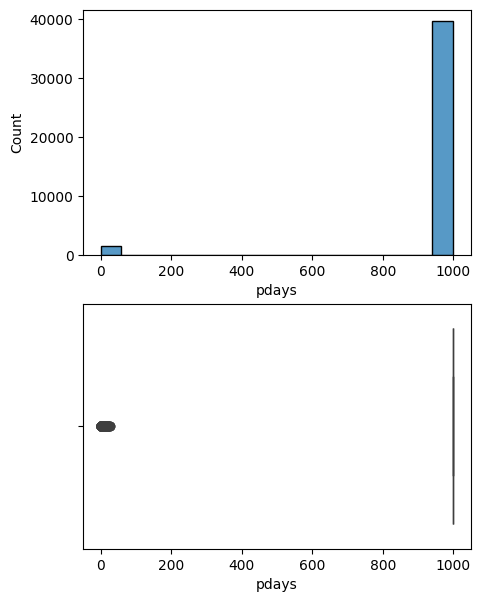

In [16]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.histplot(ax = axis[0], data = data, x = "pdays")
sns.boxplot(ax = axis[1], data = data, x = "pdays")

Parece ser una columna con valores nulos, por lo tanto esta tambien la eliminare de mi subconjunto de datos

In [17]:
data.drop(columns = 'pdays', axis=1, inplace=True)

## Analisis Variables Categoricas

##### Represento el grafico de profesiones por separado para que se vea mas claro el tipo de trabajo

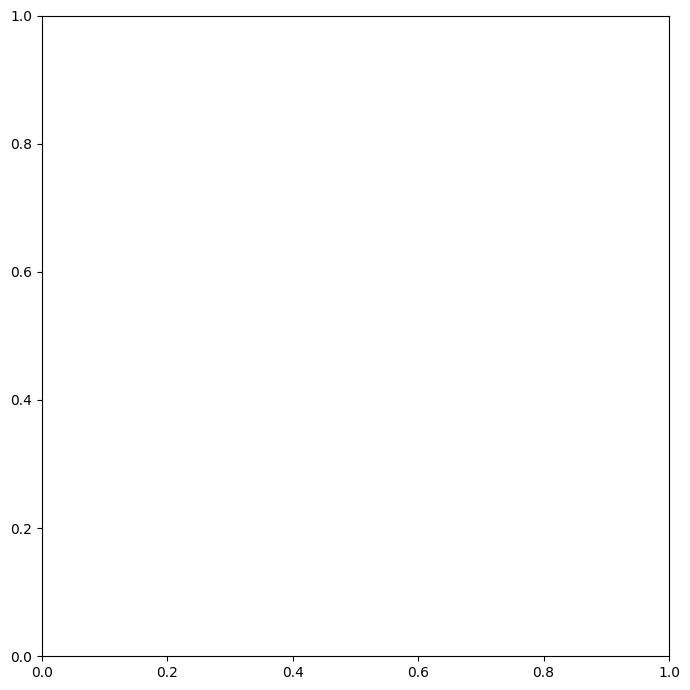

In [18]:
fig, axis = plt.subplots(1, 1, figsize = (7, 7))


plt.tight_layout()
plt.show()

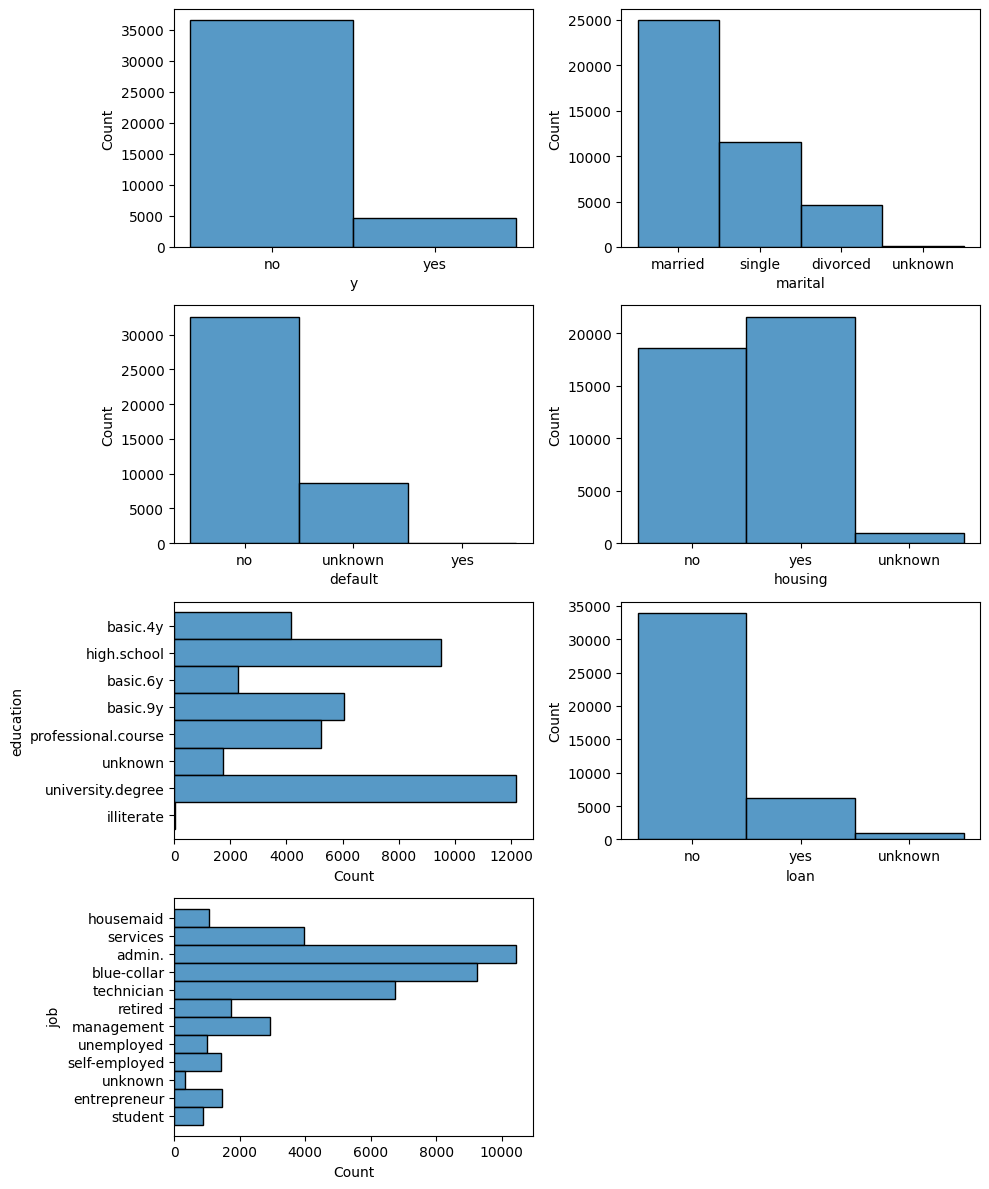

In [ ]:
# Variables Categoricas: job, marital, education, default, housing, loan, y (target)


fig, axis = plt.subplots(4, 2, figsize = (10, 12))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = data, x = "y")
sns.histplot(ax = axis[0, 1], data = data, x = "marital")
sns.histplot(ax = axis[2, 0], data = data, y = "education")
sns.histplot(ax = axis[1, 0], data = data, x = "default")
sns.histplot(ax = axis[1, 1], data = data, x = "housing")
sns.histplot(ax = axis[2, 1], data = data, x = "loan")
sns.histplot(ax = axis[3, 0], data = data, y = "job")

fig.delaxes(axis[3, 1])
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Podemos observar segun estos datos lo siguiente: 

- La gran mayoria de personas no aceptan un deposito a largo plazo.

- Una gran parte de los datos que tenemos, nos demuestran que la principar razon por la cual una persona solicita financiacion es una hipoteca, siendo el segundo un credito y el tercero un prestamo personal.

- Tenemos valores unknown (nulos) en todas las categorias excepto la target.


### Valores numericos

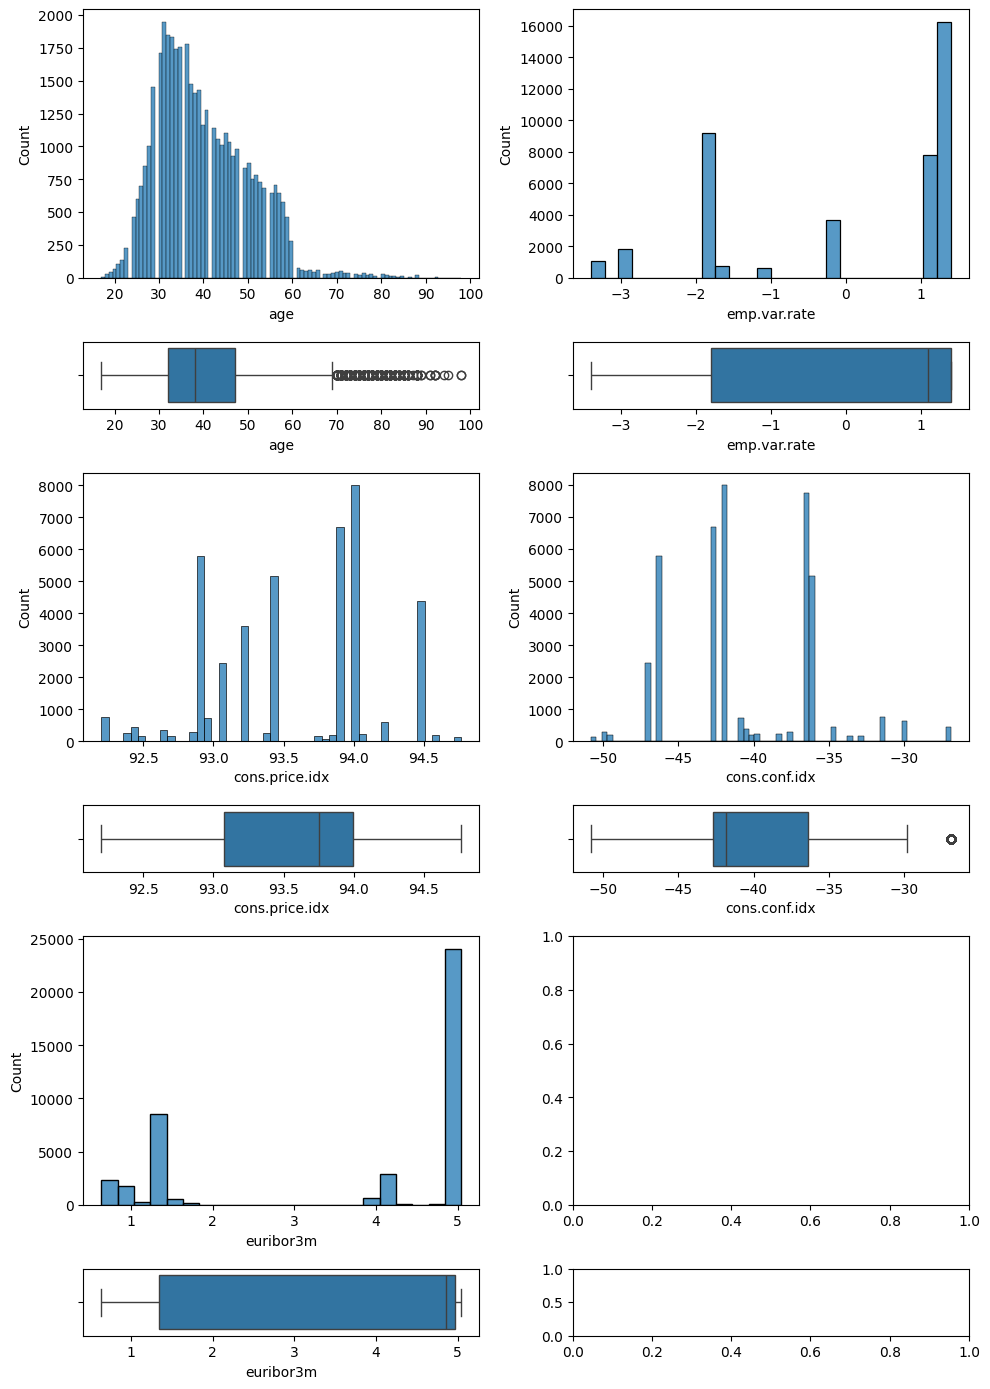

In [45]:
# Variables Numericas: age, emp.var.rate, cons.price.idx, cons.conf.idx y euribor3m

fig, axis = plt.subplots(6, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [8, 2, 8, 2, 8, 2]})

sns.histplot(ax = axis[0, 0], data = data, x = "age")
sns.boxplot(ax = axis[1, 0], data = data, x = "age")

sns.histplot(ax = axis[0, 1], data = data, x = "emp.var.rate")
sns.boxplot(ax = axis[1, 1], data = data, x = "emp.var.rate")

sns.histplot(ax = axis[2,0], data = data, x = "cons.price.idx")
sns.boxplot(ax = axis[3, 0], data = data, x = "cons.price.idx")

sns.histplot(ax = axis[2, 1], data = data, x = "cons.conf.idx")
sns.boxplot(ax = axis[3, 1], data = data, x = "cons.conf.idx")

sns.histplot(ax = axis[4, 0], data = data, x = "euribor3m")
sns.boxplot(ax = axis[5, 0], data = data, x = "euribor3m")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



### Analisis de variables multivariante

##### Continuare con el analisis categorico-categorico ya que mi target es categorica y la correlacion entre las variables numericas entre si no parece tan importante.

### Categorico-Categorico

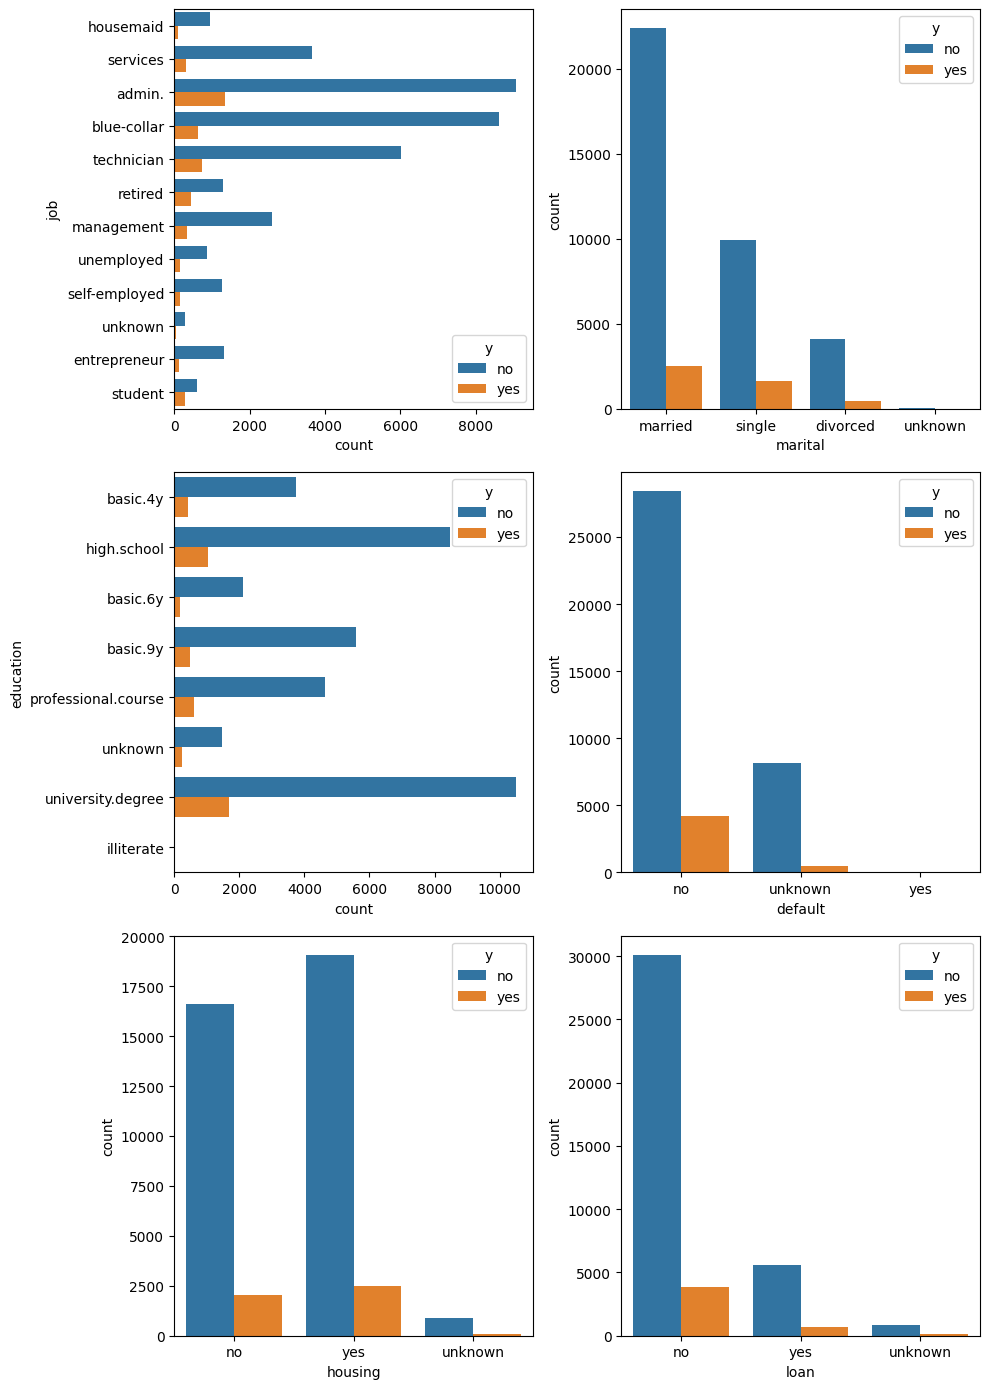

In [53]:
# Variables Categoricas: job, marital, education, default, housing, loan, y (target)


fig, axis = plt.subplots(3, 2, figsize = (10, 14))

sns.countplot(ax = axis[0, 0], data = data, y = "job", hue = "y")
sns.countplot(ax = axis[0, 1],data = data, x = "marital", hue = "y")
sns.countplot(ax = axis[1, 0],data = data, y = "education", hue = "y")
sns.countplot(ax = axis[1, 1],data = data, x = "default", hue = "y")
sns.countplot(ax = axis[2, 0],data = data, x = "housing", hue = "y")
sns.countplot(ax = axis[2, 1],data = data, x = "loan", hue = "y")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

#### podemos observar una correlacion entre la gente con mayor nivel de estudios y acceder a este deposito a largo plazo. Del resto de variables no se puede estimar una correlacion directa

## Analisis numerico - categorico

In [59]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
y                  object
job_n               int64
marital_n           int64
education_n         int64
default_n           int64
housing_n           int64
loan_n              int64
y_n                 int64
dtype: object

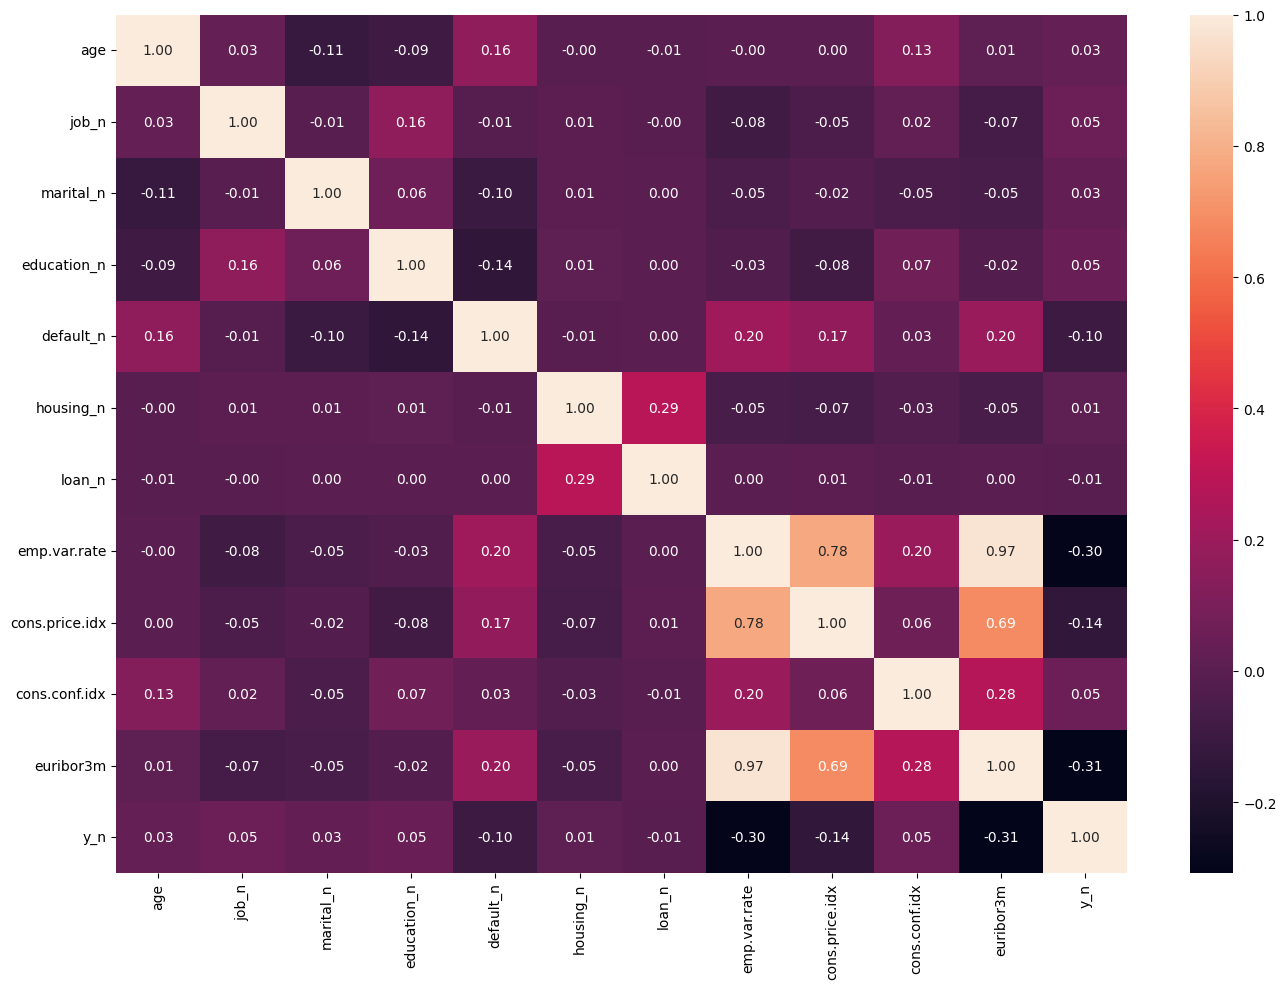

In [60]:
# Variables Categoricas: job, marital, education, default, housing, loan, y (target)

import json


# Factorizo y guardo las claves en diccionarios .json para saber las reglas de transformacion

data["job_n"] = pd.factorize(data["job"])[0]
job_transformation_rules = {row["job"]: row["job_n"] for _, row in data[["job", "job_n"]].drop_duplicates().iterrows()}

with open("../data/job_n.json", "w") as f:
  json.dump(job_transformation_rules, f)


data["marital_n"] = pd.factorize(data["marital"])[0]
marital_group_transformation_rules = {row["marital"]: row["marital_n"] for _, row in data[["marital", "marital_n"]].drop_duplicates().iterrows()}

with open("../data/marital_n.json", "w") as f:
  json.dump(marital_group_transformation_rules, f)


data["education_n"] = pd.factorize(data["education"])[0]
education_transformation_rules = {row["education"]: row["education_n"] for _, row in data[["education", "education_n"]].drop_duplicates().iterrows()}

with open("../data/education_n.json", "w") as f:
  json.dump(education_transformation_rules, f)


data["default_n"] = pd.factorize(data["default"])[0]
default_transformation_rules = {row["default"]: row["default_n"] for _, row in data[["default", "default_n"]].drop_duplicates().iterrows()}

with open("../data/default_n.json", "w") as f:
  json.dump(default_transformation_rules, f)

data["housing_n"] = pd.factorize(data["housing"])[0]
housing_transformation_rules = {row["housing"]: row["housing_n"] for _, row in data[["housing", "housing_n"]].drop_duplicates().iterrows()}

with open("../data/housing_n.json", "w") as f:
  json.dump(housing_transformation_rules, f)


data["loan_n"] = pd.factorize(data["loan"])[0]
loan_transformation_rules = {row["loan"]: row["loan_n"] for _, row in data[["loan", "loan_n"]].drop_duplicates().iterrows()}

with open("../data/loan_n.json", "w") as f:
  json.dump(loan_transformation_rules, f)


data["y_n"] = pd.factorize(data["y"])[0]
y_transformation_rules = {row["y"]: row["y_n"] for _, row in data[["y", "y_n"]].drop_duplicates().iterrows()}

with open("../data/loan_n.json", "w") as f:
  json.dump(y_transformation_rules, f)

'''with open("Sex_transformation_rules.json", "r") as f:
  sex_transformation_rules = json.load(f)

total_data["Sex_n"] = total_data["Sex"].apply(lambda x: sex_transformation_rules[x])'''



fig, axes = plt.subplots(figsize=(14, 10))

sns.heatmap(data[["age", "job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "y_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()


# Draw Plot
plt.show()

#### Se puede observar lo siguiente: 

- Las variables con mas correlacion con la target son las que tienen relacion directa con las variables que indican factores economicos.
- Se puede observar que las variables housing y loan tienen una correlacion entre ellas mismas.
- Default esta relacionada de manera significativa con las variables economicas y a su vez es la variable con mayor correlacion con la edad.

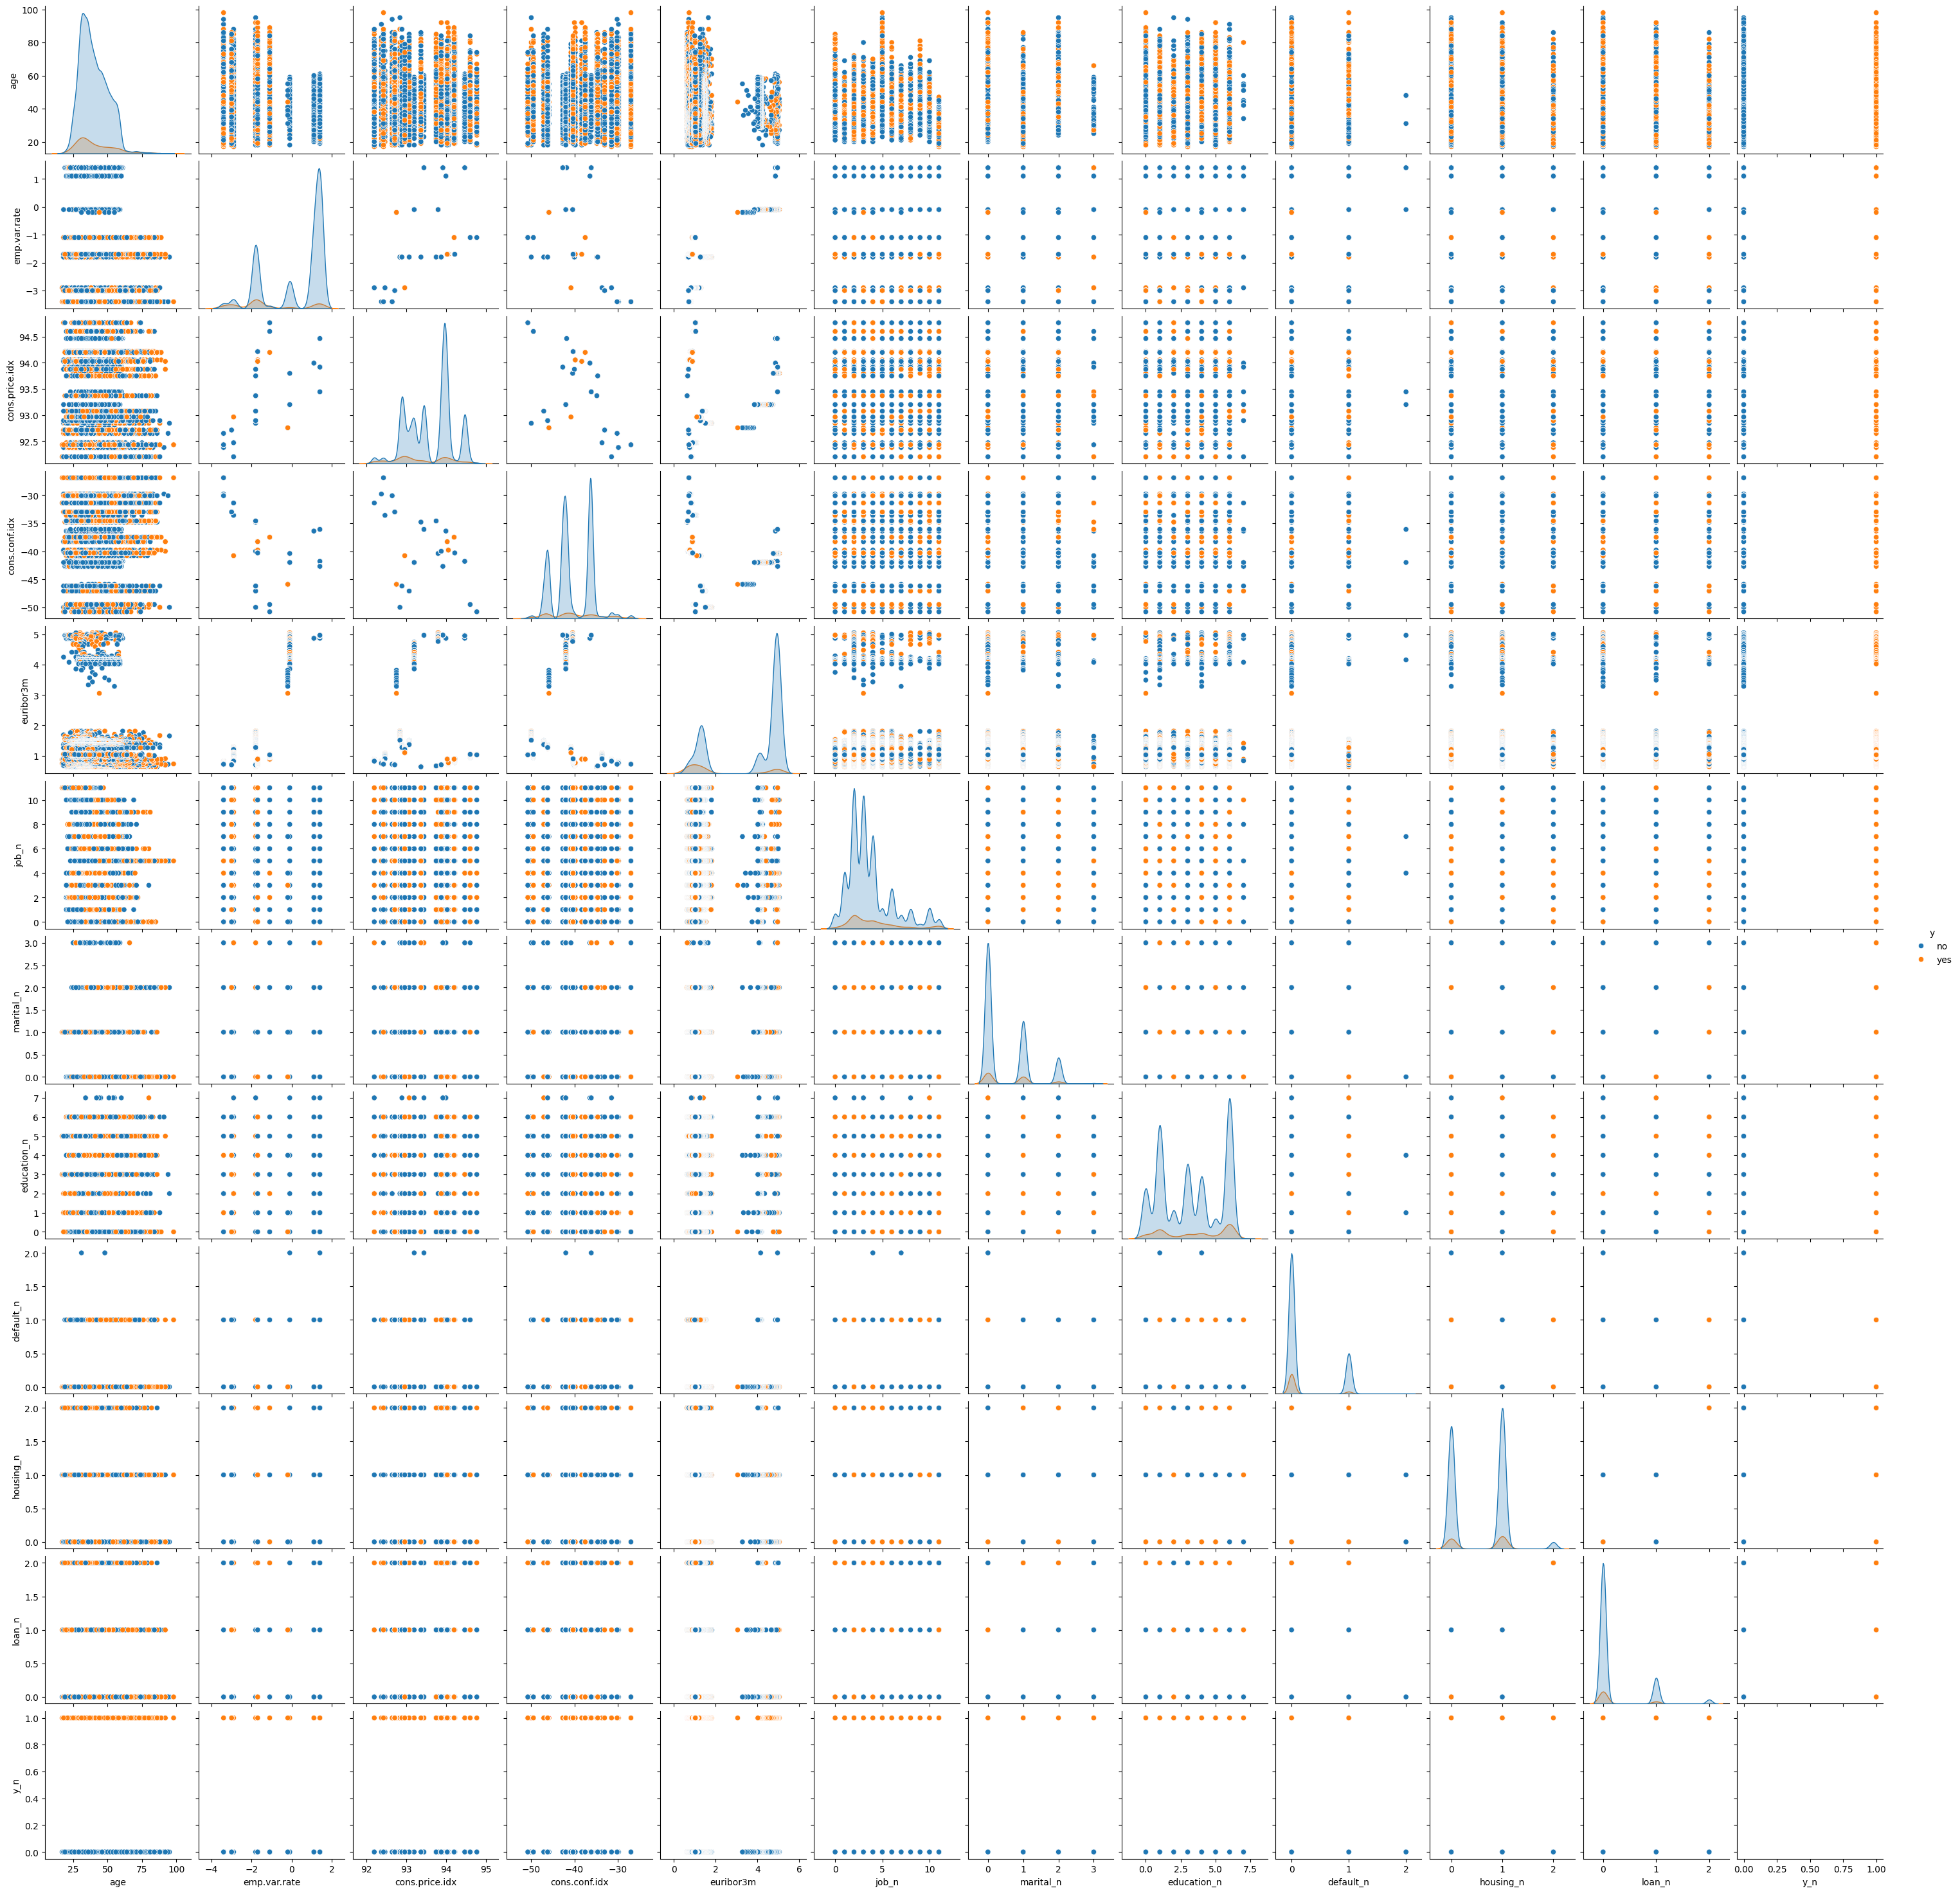

In [61]:
sns.pairplot(data = data, hue="y")


# Analisis de Outliers

In [63]:
data.describe()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,job_n,marital_n,education_n,default_n,housing_n,loan_n,y_n
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.081886,93.575664,-40.502600,3.621291,3.673691,0.510634,3.277532,0.208872,0.571914,0.199767,0.112654
std,10.42125,1.570960,0.578840,4.628198,1.734447,2.454116,0.696779,2.185525,0.406686,0.541209,0.456002,0.316173
min,17.00000,-3.400000,92.201000,-50.800000,0.634000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,-1.800000,93.075000,-42.700000,1.344000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,1.100000,93.749000,-41.800000,4.857000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,1.400000,93.994000,-36.400000,4.961000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,1.400000,94.767000,-26.900000,5.045000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000


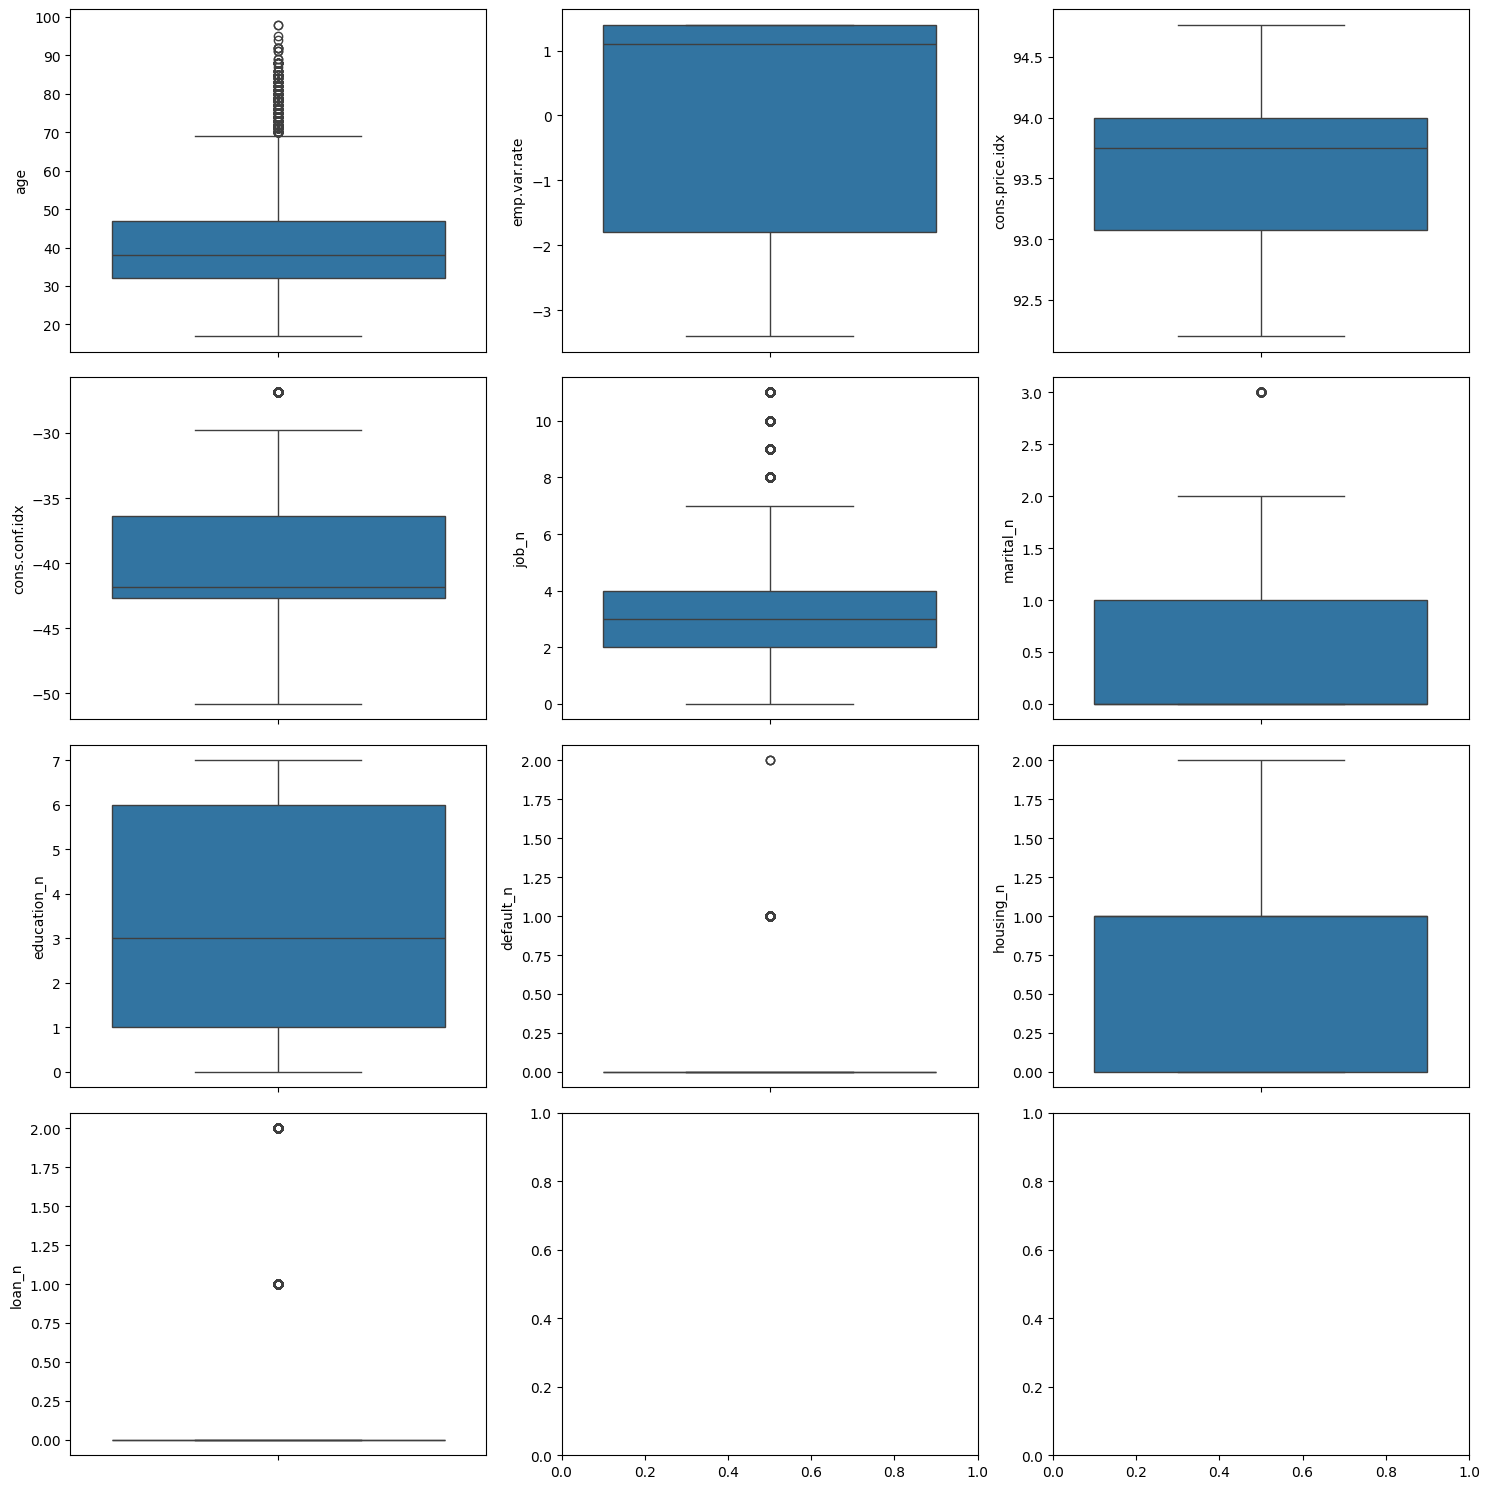

In [66]:
fig, axes = plt.subplots(4, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = data, y = "age")
sns.boxplot(ax = axes[0, 1], data = data, y = "emp.var.rate")
sns.boxplot(ax = axes[0, 2], data = data, y = "cons.price.idx")
sns.boxplot(ax = axes[1, 0], data = data, y = "cons.conf.idx")
sns.boxplot(ax = axes[1, 1], data = data, y = "job_n")
sns.boxplot(ax = axes[1, 2], data = data, y = "marital_n")
sns.boxplot(ax = axes[2, 0], data = data, y = "education_n")
sns.boxplot(ax = axes[2, 1], data = data, y = "default_n")
sns.boxplot(ax = axes[2, 2], data = data, y = "housing_n")
sns.boxplot(ax = axes[3, 0], data = data, y = "loan_n")

plt.tight_layout()

plt.show()

Creamos dos dataframes, uno con Outliers y otro sin Outliers.

De esta manera podremos utilizar mas adelante los dos dataframes y ver cual de los dos es mas optimo a la hora de entrenar el modelo.

In [67]:
# Creo copias del dataframe, una contendra outliers la otra no
total_data_con_outliers = data.copy()
total_data_sin_outliers = data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["loan_n", "default_n", "marital_n", "job_n", "cons.conf.idx", "age"]:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict.update({column: limits_list})

with open("../data/outliers_replacement.json", "w") as f:
  json.dump(outliers_dict, f)
outliers_dict

{'loan_n': [np.float64(0.0), np.float64(0.0)],
 'default_n': [np.float64(0.0), np.float64(0.0)],
 'marital_n': [0, np.float64(2.5)],
 'job_n': [0, np.float64(7.0)],
 'cons.conf.idx': [-50.8, np.float64(-26.949999999999992)],
 'age': [np.float64(9.5), np.float64(69.5)]}

Busco los valores nulos

In [68]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
y_n               0
dtype: int64

In [69]:
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
y_n               0
dtype: int64

## Escalado de valores

### Train/Test Split  

In [73]:
from sklearn.model_selection import train_test_split

num_var = ['age', 'loan_n', 'housing_n', 'education_n', 'marital_n', 'job_n', 'euribor3m', 'cons.conf.idx', 'cons.price.idx', 'emp.var.rate', 'default_n']


# Dividimos el conjunto de datos en muestras de train y test
x_con_outliers = total_data_con_outliers.drop('y_n', axis = 1)[num_var]
x_sin_outliers = total_data_sin_outliers.drop('y_n', axis = 1)[num_var]
y = total_data_con_outliers['y_n']

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(x_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(x_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

X_train_con_outliers.head()

,age,loan_n,housing_n,education_n,marital_n,job_n,euribor3m,cons.conf.idx,cons.price.idx,emp.var.rate,default_n
12556,40,0,1,3,0,3,4.960,-42.7,93.918,1.4,1
35451,31,0,0,6,0,2,1.244,-46.2,92.893,-1.8,0
30592,59,0,0,0,0,5,1.354,-46.2,92.893,-1.8,0
17914,43,0,1,3,2,0,4.961,-42.7,93.918,1.4,0
3315,39,0,0,1,1,2,4.860,-36.4,93.994,1.1,1


## Normalizacion

In [74]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_var)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_var)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_var)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_var)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,age,loan_n,housing_n,education_n,marital_n,job_n,euribor3m,cons.conf.idx,cons.price.idx,emp.var.rate,default_n
12556,-0.001669,-0.438945,0.787712,-0.12745,-0.738185,-0.271142,0.771354,-0.472769,0.589080,0.838794,1.948567
35451,-0.864095,-0.438945,-1.056870,1.24463,-0.738185,-0.677848,-1.372028,-1.229916,-1.180760,-1.199440,-0.512631
30592,1.819007,-0.438945,-1.056870,-1.49953,-0.738185,0.542271,-1.308581,-1.229916,-1.180760,-1.199440,-0.512631
17914,0.285806,-0.438945,0.787712,-0.12745,2.126401,-1.491260,0.771930,-0.472769,0.589080,0.838794,-0.512631
3315,-0.097494,-0.438945,-1.056870,-1.04217,0.694108,-0.677848,0.713674,0.890097,0.720307,0.647709,1.948567


## Escalado minimo-maximo

In [75]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_var)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_var)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_var)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_var)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,age,loan_n,housing_n,education_n,marital_n,job_n,euribor3m,cons.conf.idx,cons.price.idx,emp.var.rate,default_n
12556,0.283951,0.0,0.5,0.428571,0.000000,0.272727,0.980730,0.338912,0.669135,1.000000,0.5
35451,0.172840,0.0,0.0,0.857143,0.000000,0.181818,0.138291,0.192469,0.269680,0.333333,0.0
30592,0.518519,0.0,0.0,0.000000,0.000000,0.454545,0.163228,0.192469,0.269680,0.333333,0.0
17914,0.320988,0.0,0.5,0.428571,0.666667,0.000000,0.980957,0.338912,0.669135,1.000000,0.0
3315,0.271605,0.0,0.0,0.142857,0.333333,0.181818,0.958059,0.602510,0.698753,0.937500,0.5


# Seleccion de caracteristicas

In [87]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 6)
selection_model.fit(X_train_con_outliers_scal, y_train)

ix = selection_model.get_support()
x_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers_scal), columns = X_train_con_outliers_scal.columns.values[ix])
x_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers_scal), columns = X_test_con_outliers_scal.columns.values[ix])

# GUARDO x_train_sel.columns
import json

with open("../data/feature_selection_k_5.json", "w") as f:
  json.dump(x_train_sel.columns.tolist(), f)

x_train_sel.head()

,job_n,euribor3m,cons.conf.idx,cons.price.idx,emp.var.rate,default_n
0,0.272727,0.980730,0.338912,0.669135,1.000000,0.5
1,0.181818,0.138291,0.192469,0.269680,0.333333,0.0
2,0.454545,0.163228,0.192469,0.269680,0.333333,0.0
3,0.000000,0.980957,0.338912,0.669135,1.000000,0.0
4,0.181818,0.958059,0.602510,0.698753,0.937500,0.5


In [85]:
x_train_sel["y_n"] = list(y_train)
x_test_sel["y_n"] = list(y_test)

In [86]:
x_train_sel.to_csv("../assets/BankDataLongDeposit_train.csv", index=False)
x_test_sel.to_csv("../assets/BankDataLongDeposit_test.csv", index=False)